<a href="https://www.kaggle.com/code/sonawanelalitsunil/nasdaq-dataset-99-randomforest?scriptVersionId=205377769" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nasdq-dataset/nasdq.csv


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Importing Dataset</p>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/kaggle/input/nasdq-dataset/nasdq.csv')

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Data Exploration</p> 

In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3914 non-null   object 
 1   Open          3914 non-null   float64
 2   High          3914 non-null   float64
 3   Low           3914 non-null   float64
 4   Close         3914 non-null   float64
 5   Volume        3914 non-null   float64
 6   InterestRate  3914 non-null   float64
 7   ExchangeRate  3914 non-null   float64
 8   VIX           3914 non-null   float64
 9   TEDSpread     3914 non-null   float64
 10  EFFR          3914 non-null   float64
 11  Gold          3914 non-null   float64
 12  Oil           3914 non-null   float64
dtypes: float64(12), object(1)
memory usage: 397.6+ KB
None


In [5]:
print(df.describe())

              Open         High          Low        Close        Volume  \
count  3914.000000  3914.000000  3914.000000  3914.000000  3.914000e+03   
mean     29.218649    29.491567    28.943843    29.226927  3.708611e+06   
std      19.669386    19.840919    19.486496    19.668668  3.035420e+06   
min       5.820000     5.916667     5.726667     5.766667  5.754000e+05   
25%      10.995000    11.101667    10.890000    11.024167  2.035875e+06   
50%      23.708333    23.858334    23.575001    23.733334  2.834950e+06   
75%      47.375001    47.807499    46.804999    47.330002  4.276500e+06   
max      75.599998    75.680000    74.050003    75.239998  5.478960e+07   

       InterestRate  ExchangeRate          VIX    TEDSpread         EFFR  \
count   3914.000000   3914.000000  3914.000000  3914.000000  3914.000000   
mean       1.191165      1.191561    18.374990     0.241193     1.189384   
std        1.686064      0.113733     6.965917     0.148833     1.684429   
min        0.050000 

In [6]:
print(df.isnull().sum()) 

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
InterestRate    0
ExchangeRate    0
VIX             0
TEDSpread       0
EFFR            0
Gold            0
Oil             0
dtype: int64


In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,InterestRate,ExchangeRate,VIX,TEDSpread,EFFR,Gold,Oil
0,2010-01-04,6.640000,6.810000,6.633333,6.746667,6514500.0,0.11,1.4419,20.04,0.17,0.12,1117.699951,81.510002
1,2010-01-05,6.643333,6.773333,6.643333,6.766667,4445100.0,0.11,1.4402,19.35,0.18,0.12,1118.099976,81.769997
2,2010-01-06,6.733333,6.786667,6.720000,6.763333,7340100.0,0.11,1.4404,19.16,0.19,0.12,1135.900024,83.180000
3,2010-01-07,6.750000,6.766667,6.630000,6.673333,8498400.0,0.11,1.4314,19.06,0.20,0.10,1133.099976,82.660004
4,2010-01-08,6.676667,6.766667,6.626667,6.743333,4347600.0,0.11,1.4357,18.13,0.20,0.11,1138.199951,82.750000


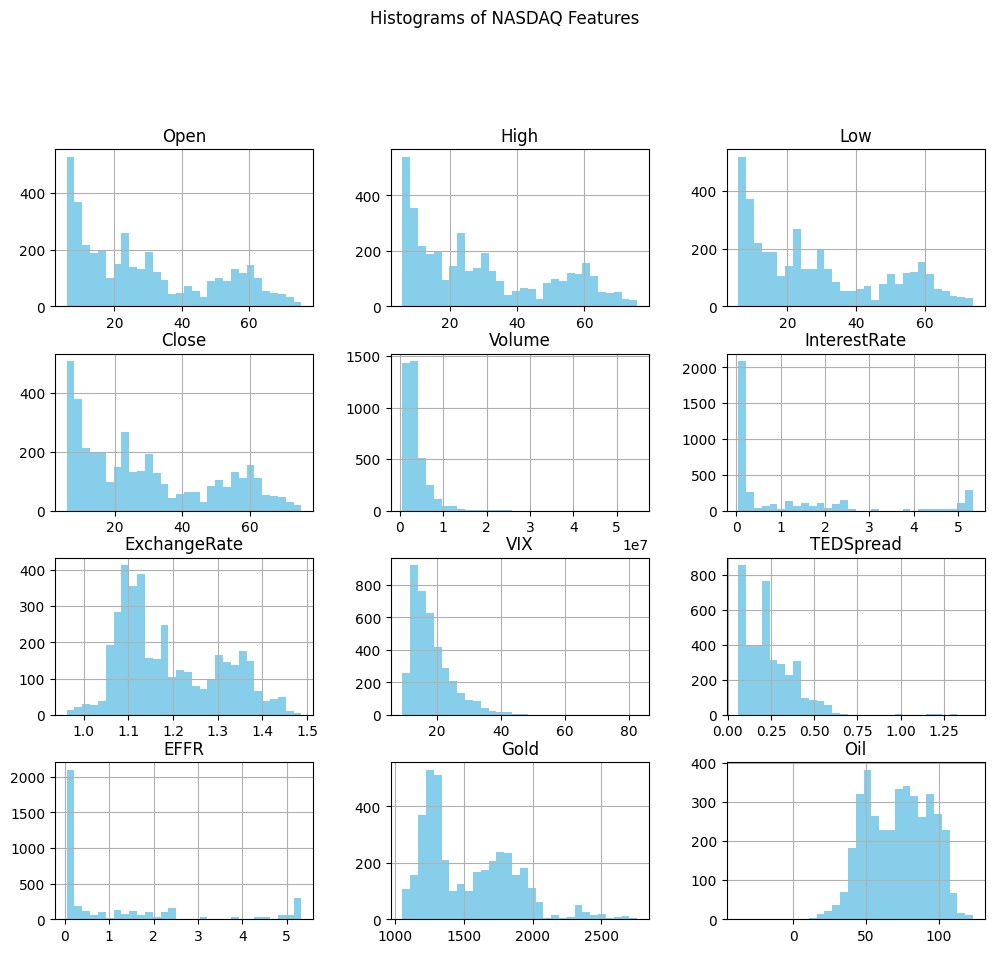

In [8]:
features =df
features.hist(bins=30, figsize=(12, 10), color='skyblue')
plt.suptitle("Histograms of NASDAQ Features", y=1.02)
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3914 entries, 0 to 3913
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3914 non-null   object 
 1   Open          3914 non-null   float64
 2   High          3914 non-null   float64
 3   Low           3914 non-null   float64
 4   Close         3914 non-null   float64
 5   Volume        3914 non-null   float64
 6   InterestRate  3914 non-null   float64
 7   ExchangeRate  3914 non-null   float64
 8   VIX           3914 non-null   float64
 9   TEDSpread     3914 non-null   float64
 10  EFFR          3914 non-null   float64
 11  Gold          3914 non-null   float64
 12  Oil           3914 non-null   float64
dtypes: float64(12), object(1)
memory usage: 397.6+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [11]:
# Rename columns to remove spaces
df.columns = df.columns.str.replace(' ', '')

In [12]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 3.1 MB/s eta 0:00:00


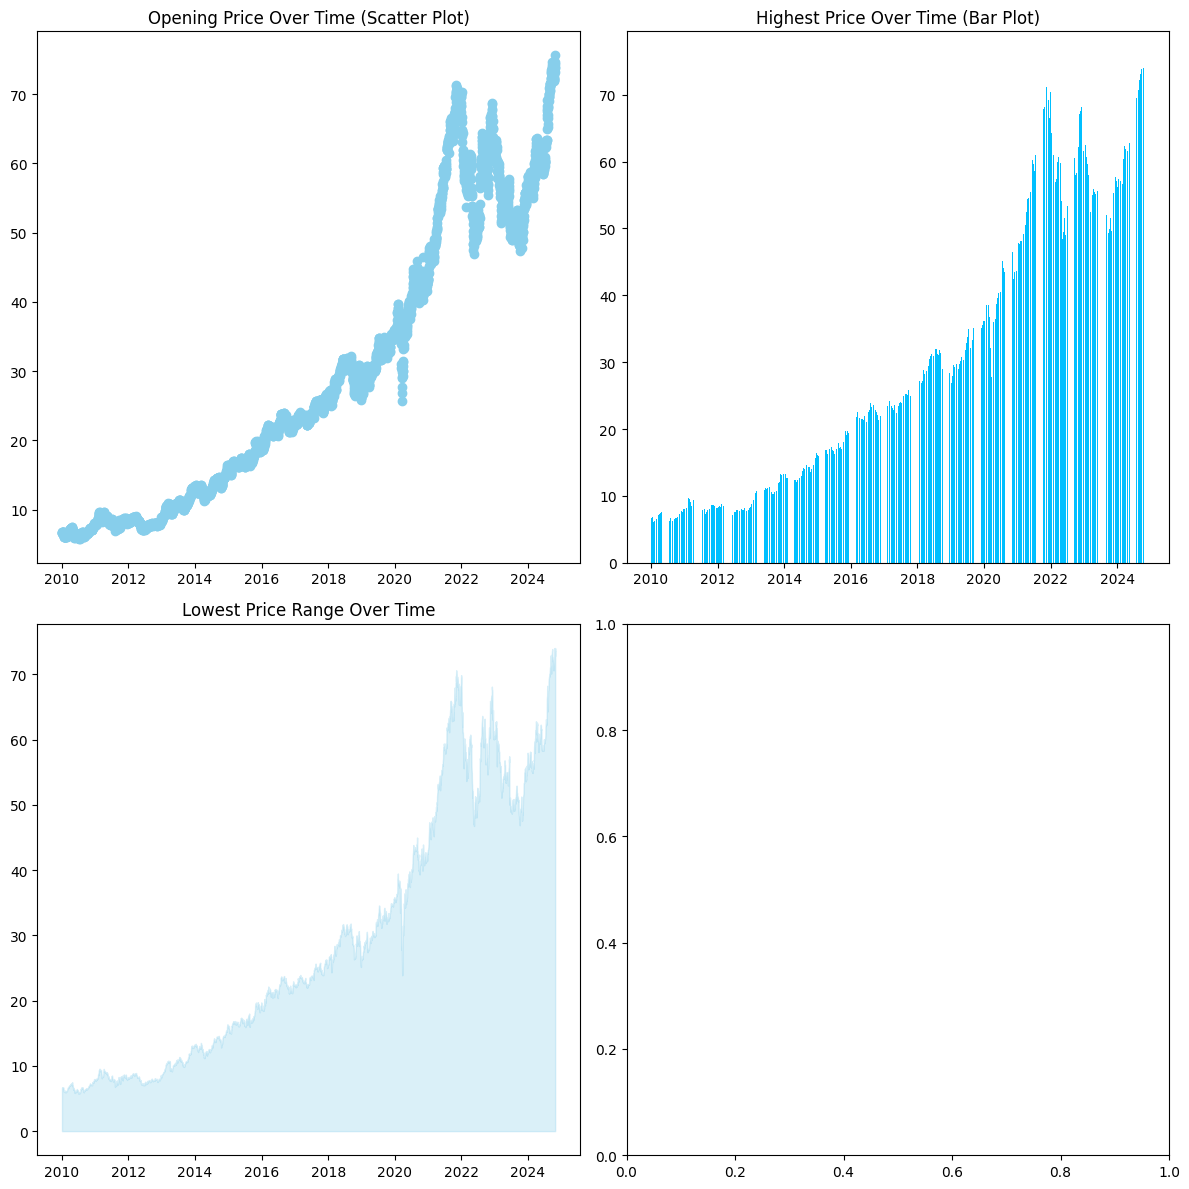

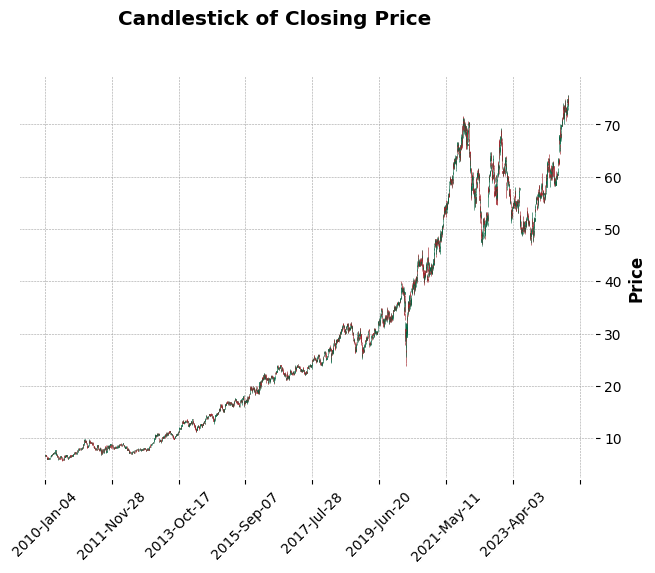

In [13]:
import matplotlib.pyplot as plt
import mplfinance as mpf

# Define the color palette
colors = ['skyblue', 'deepskyblue']

# Create subplots for Open, High, and Low prices
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

# Opening Price - Scatter Plot
ax[0, 0].scatter(df.index, df['Open'], color=colors[0])
ax[0, 0].set_title("Opening Price Over Time (Scatter Plot)")

# Highest Price - Bar Plot
ax[0, 1].bar(df.index, df['High'], color=colors[1])
ax[0, 1].set_title("Highest Price Over Time (Bar Plot)")

# Lowest Price - Area Plot
ax[1, 0].fill_between(df.index, df['Low'], color=colors[0], alpha=0.3)
ax[1, 0].set_title("Lowest Price Range Over Time")

# Adjust layout for the first figure
plt.tight_layout()

# Create a separate figure for the candlestick plot
mpf.plot(df[['Open', 'High', 'Low', 'Close']], type='candle', style='charles', title="Candlestick of Closing Price")

plt.show()


In [14]:
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate',
       'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil'],
      dtype='object')


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Seasonality And Trend Analysis</p>

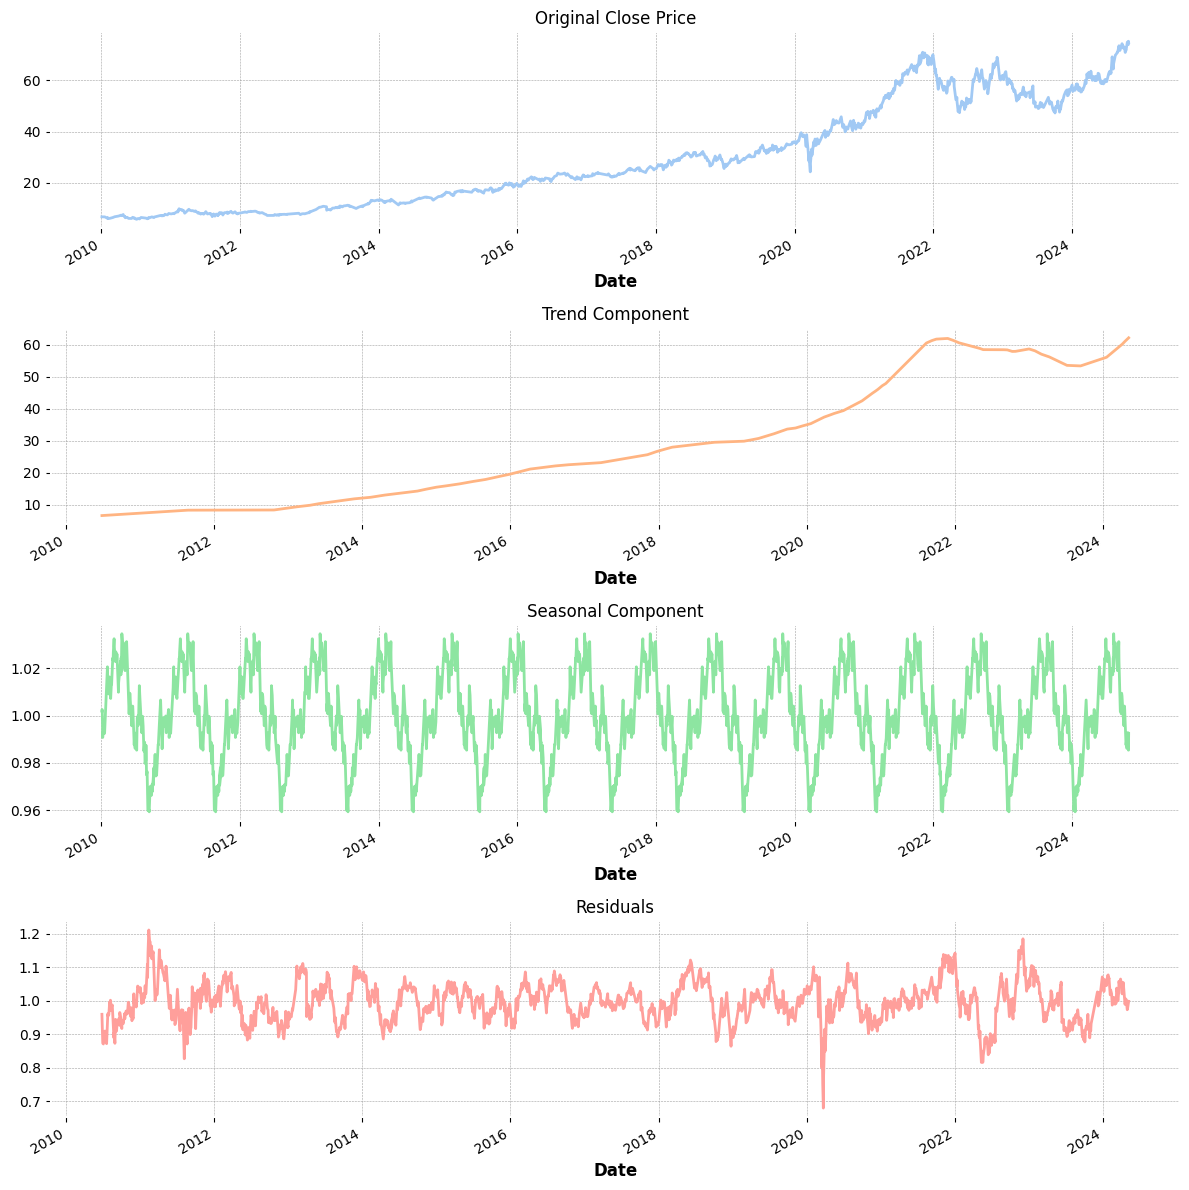

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Sample color palette
colors = sns.color_palette("pastel")

# Perform seasonal decomposition on Close prices
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=252)  # 252 trading days ~ 1 year
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
df['Close'].plot(ax=ax1, color=colors[0], title="Original Close Price")
trend.plot(ax=ax2, color=colors[1], title="Trend Component")
seasonal.plot(ax=ax3, color=colors[2], title="Seasonal Component")
residual.plot(ax=ax4, color=colors[3], title="Residuals")
plt.tight_layout()
plt.show()

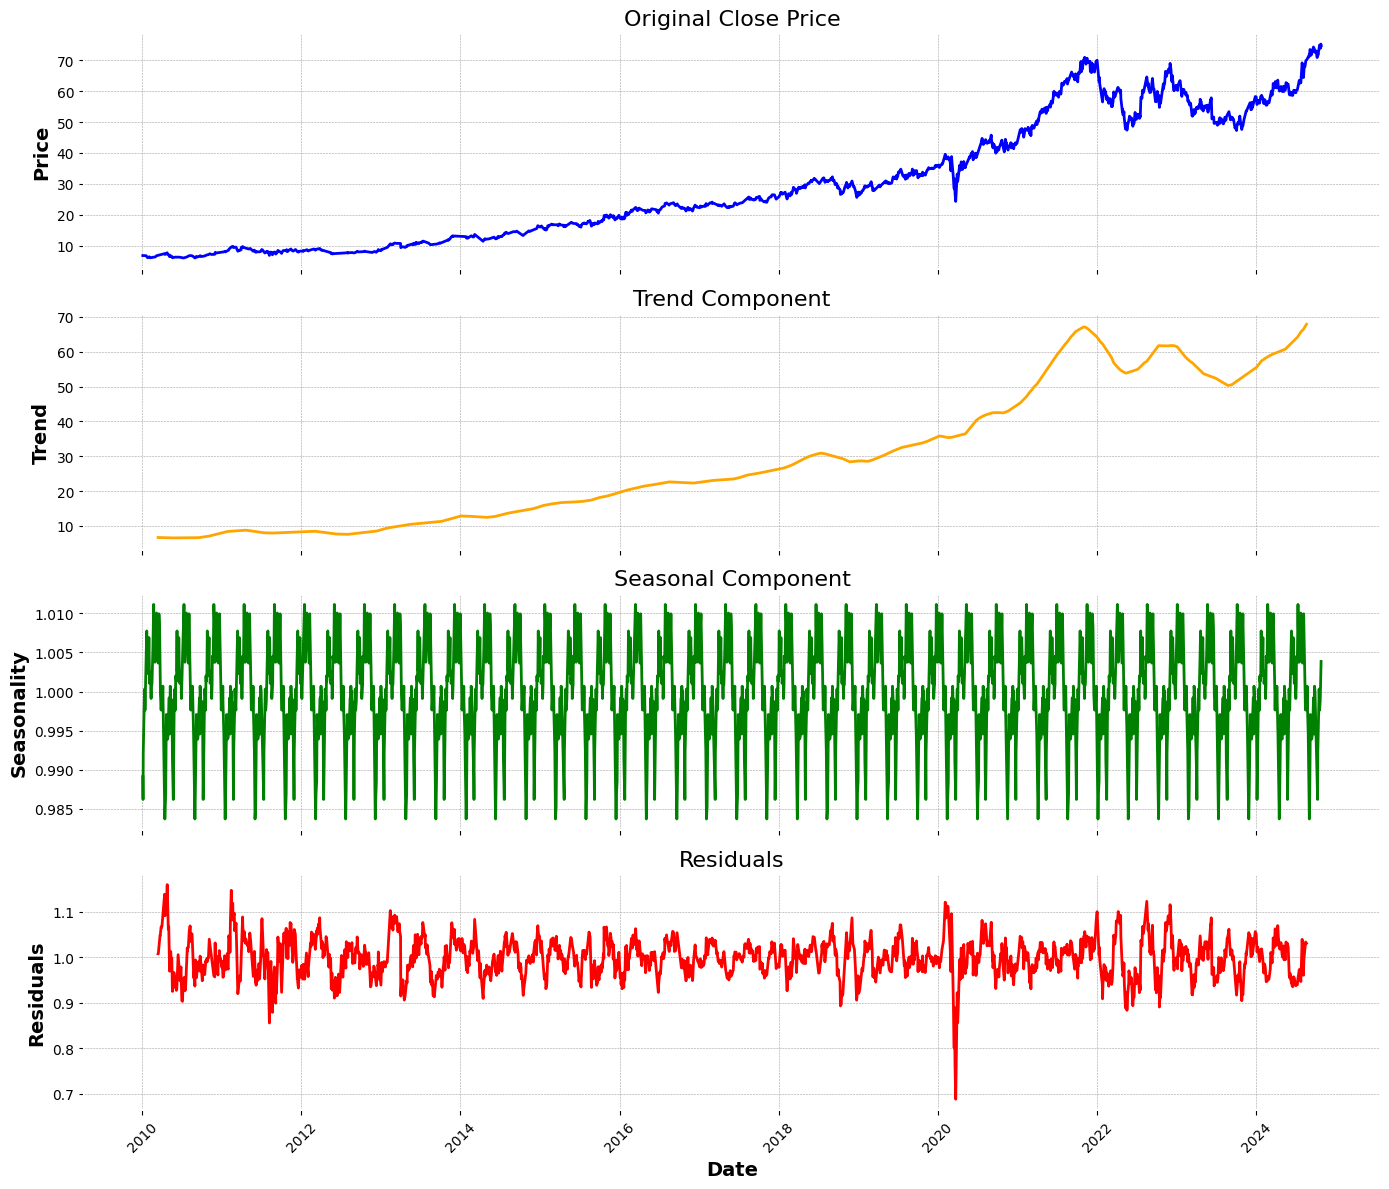

In [16]:
# Perform seasonal decomposition on Close prices with a smaller period
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=100)  # Adjusted period
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
fig, axs = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Original Close Price
axs[0].plot(df['Close'], color='blue', linewidth=2)
axs[0].set_title("Original Close Price", fontsize=16)
axs[0].set_ylabel("Price", fontsize=14)
axs[0].grid(True)

# Trend Component
axs[1].plot(trend, color='orange', linewidth=2)
axs[1].set_title("Trend Component", fontsize=16)
axs[1].set_ylabel("Trend", fontsize=14)
axs[1].grid(True)

# Seasonal Component
axs[2].plot(seasonal, color='green', linewidth=2)
axs[2].set_title("Seasonal Component", fontsize=16)
axs[2].set_ylabel("Seasonality", fontsize=14)
axs[2].grid(True)

# Residuals
axs[3].plot(residual, color='red', linewidth=2)
axs[3].set_title("Residuals", fontsize=16)
axs[3].set_ylabel("Residuals", fontsize=14)
axs[3].grid(True)

# Set common x-axis label
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


In [17]:
print(df.head())

                Open      High       Low     Close     Volume  InterestRate  \
Date                                                                          
2010-01-04  6.640000  6.810000  6.633333  6.746667  6514500.0          0.11   
2010-01-05  6.643333  6.773333  6.643333  6.766667  4445100.0          0.11   
2010-01-06  6.733333  6.786667  6.720000  6.763333  7340100.0          0.11   
2010-01-07  6.750000  6.766667  6.630000  6.673333  8498400.0          0.11   
2010-01-08  6.676667  6.766667  6.626667  6.743333  4347600.0          0.11   

            ExchangeRate    VIX  TEDSpread  EFFR         Gold        Oil  
Date                                                                      
2010-01-04        1.4419  20.04       0.17  0.12  1117.699951  81.510002  
2010-01-05        1.4402  19.35       0.18  0.12  1118.099976  81.769997  
2010-01-06        1.4404  19.16       0.19  0.12  1135.900024  83.180000  
2010-01-07        1.4314  19.06       0.20  0.10  1133.099976  82.66000

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">ROlling Analysis</p>

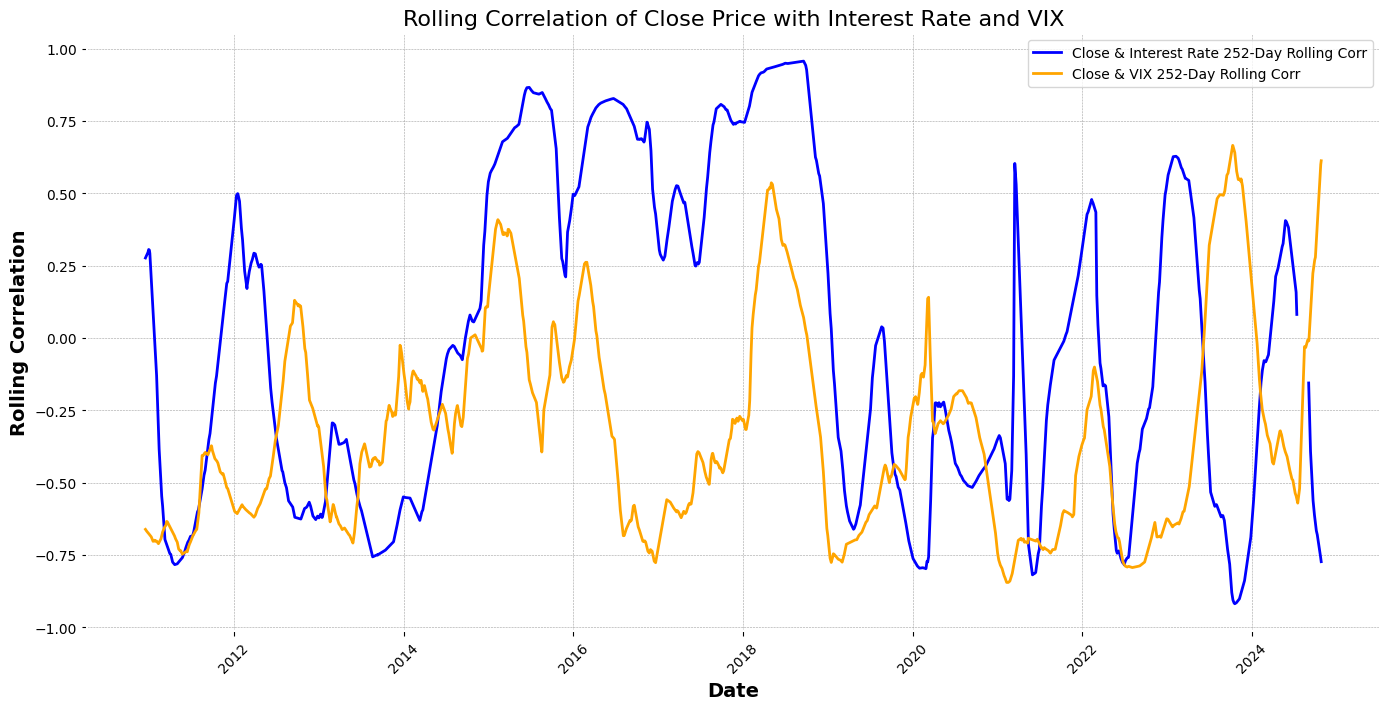

In [18]:
# Define required columns
required_columns = ['Close', 'InterestRate', 'VIX']

# Check for missing columns
missing_columns = [col for col in required_columns if col not in df.columns]

if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Calculate a 252-day rolling correlation between Close price and key indicators
    df['Close_InterestRate_Corr'] = df['Close'].rolling(252).corr(df['InterestRate'])
    df['Close_VIX_Corr'] = df['Close'].rolling(252).corr(df['VIX'])

    # Plot the rolling correlations
    plt.figure(figsize=(14, 7))
    plt.plot(df['Close_InterestRate_Corr'], label='Close & Interest Rate 252-Day Rolling Corr', color='blue', linewidth=2)
    plt.plot(df['Close_VIX_Corr'], label='Close & VIX 252-Day Rolling Corr', color='orange', linewidth=2)

    # Add title and labels
    plt.title("Rolling Correlation of Close Price with Interest Rate and VIX", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Rolling Correlation", fontsize=14)

    # Add gridlines
    plt.grid(True)

    # Show legend
    plt.legend()

    # Adjust layout for better spacing
    plt.tight_layout()
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

    # Show the plot
    plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Volatility Clustering Analysis</p>

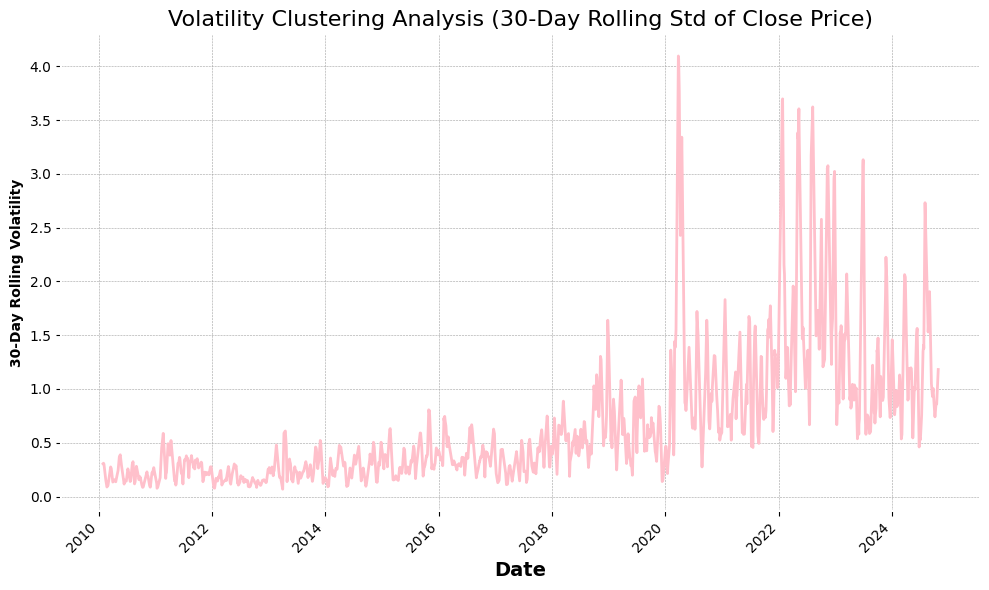

In [19]:
# Rolling standard deviation as a measure of volatility
df['Rolling_Volatility'] = df['Close'].rolling(window=20).std()

# Plot volatility clusters
plt.figure(figsize=(10, 6))
df['Rolling_Volatility'].plot(color='Pink', linewidth=2)

# Enhance the plot
plt.title("Volatility Clustering Analysis (30-Day Rolling Std of Close Price)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("30-Day Rolling Volatility", fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines for better readability

# Show the plot
plt.tight_layout()
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Sentimental Analysis</p>

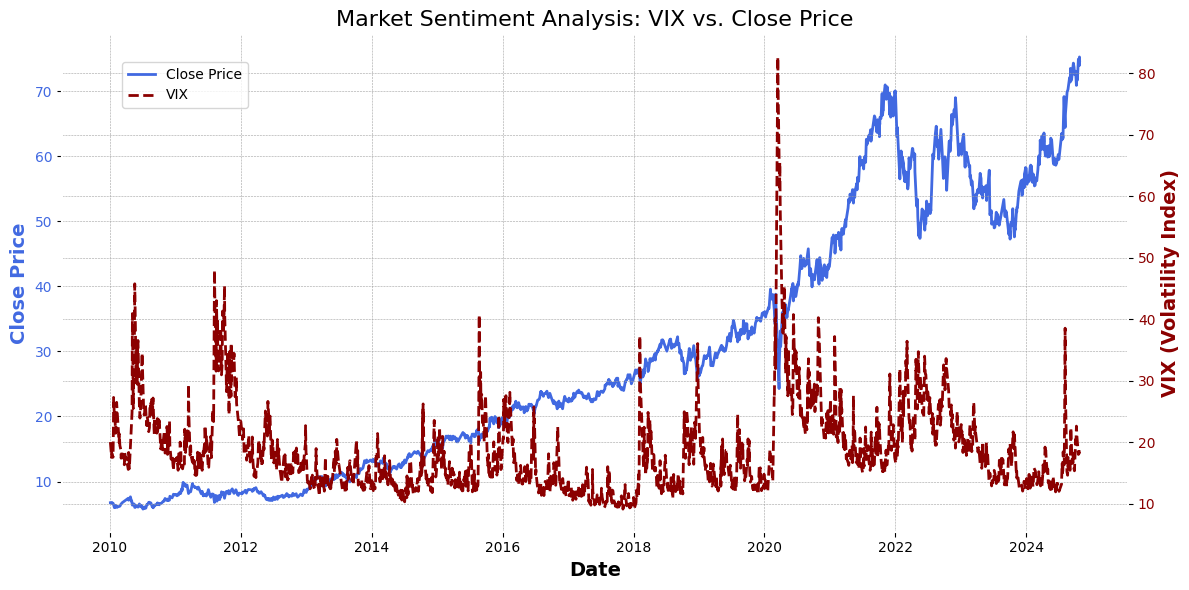

In [20]:
# Plot VIX and Close price on the same graph to observe inverse trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Close Price on the primary y-axis
ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Close Price", color="royalblue", fontsize=14)
ax1.plot(df['Close'], color="royalblue", label="Close Price", linewidth=2)
ax1.tick_params(axis="y", labelcolor="royalblue")
ax1.grid(True)  # Enable grid on the primary y-axis for clarity

# Plot VIX on the secondary y-axis
ax2 = ax1.twinx()  
ax2.set_ylabel("VIX (Volatility Index)", color="darkred", fontsize=14)
ax2.plot(df['VIX'], color="darkred", linestyle="--", label="VIX", linewidth=2)
ax2.tick_params(axis="y", labelcolor="darkred")

# Add a title and a combined legend
plt.title("Market Sentiment Analysis: VIX vs. Close Price", fontsize=16)
fig.tight_layout()  # Adjust layout for better fit
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show plot
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">correlation Analysis</p>

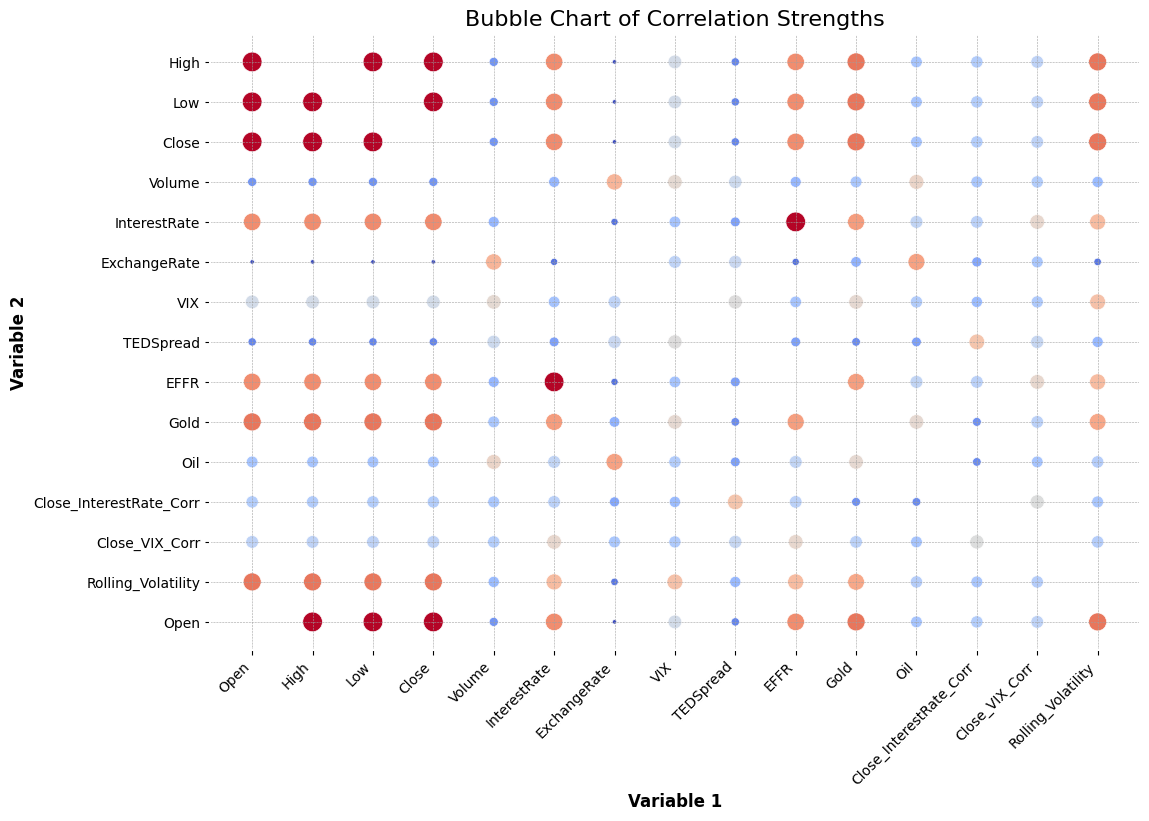

In [21]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Prepare data for bubble chart
corr_pairs = correlation_matrix.unstack().reset_index()
corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
corr_pairs = corr_pairs[corr_pairs['Variable 1'] != corr_pairs['Variable 2']]

# Plot bubble chart
plt.figure(figsize=(12, 8))
bubble_chart = sns.scatterplot(data=corr_pairs, x="Variable 1", y="Variable 2", 
                               size="Correlation", hue="Correlation", sizes=(10, 200),
                               palette="coolwarm", legend=None)
bubble_chart.set_title("Bubble Chart of Correlation Strengths", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.show()


In [22]:
# Insights on Close Price Correlations
correlated_features = correlation_matrix['Close'].sort_values(ascending=False)
print("Top features correlated with 'Close':\n", correlated_features)


Top features correlated with 'Close':
 Close                      1.000000
Low                        0.999891
High                       0.999879
Open                       0.999745
Gold                       0.713888
Rolling_Volatility         0.711765
InterestRate               0.632332
EFFR                       0.630756
VIX                        0.092566
Close_VIX_Corr            -0.022045
Close_InterestRate_Corr   -0.076390
Oil                       -0.141233
Volume                    -0.391036
TEDSpread                 -0.453460
ExchangeRate              -0.680449
Name: Close, dtype: float64


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Feature Engineering</p>

In [23]:
# Check if new columns are present in the data
print(df.columns)

# If columns are missing, re-add them
if 'Daily_Return' not in df.columns:
    df['Daily_Return'] = df['Close'].pct_change()
if 'Volatility' not in df.columns:
    df['Volatility'] = df['Close'].rolling(window=30).std()
if 'Rolling_Mean_Close' not in df.columns:
    df['Rolling_Mean_Close'] = df['Close'].rolling(window=30).mean()

df.dropna(inplace=True)  # Remove any NA values generated by rolling calculations


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'InterestRate',
       'ExchangeRate', 'VIX', 'TEDSpread', 'EFFR', 'Gold', 'Oil',
       'Close_InterestRate_Corr', 'Close_VIX_Corr', 'Rolling_Volatility'],
      dtype='object')


In [24]:
# Display the new features
df[['Close', 'Daily_Return', 'Volatility', 'Rolling_Mean_Close']].head()

,Close,Daily_Return,Volatility,Rolling_Mean_Close
Date,,,,
2010-12-17,7.833333,0.001705,0.227920,7.376000
2010-12-20,7.830000,-0.000426,0.242298,7.392556
2010-12-21,8.053333,0.028523,0.268704,7.419667
2010-12-22,8.053333,0.000000,0.291379,7.444778
2010-12-23,7.940000,-0.014073,0.302411,7.467889


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [26]:
print(df.head())

                Open      High       Low     Close      Volume  InterestRate  \
Date                                                                           
2010-12-17  7.746667  7.873333  7.743333  7.833333  10617900.0          0.18   
2010-12-20  7.833333  7.850000  7.786667  7.830000   5502000.0          0.18   
2010-12-21  7.850000  8.113333  7.806667  8.053333  10258200.0          0.18   
2010-12-22  8.053333  8.090000  7.983333  8.053333   4510200.0          0.18   
2010-12-23  7.800000  7.980000  7.756667  7.940000   4235100.0          0.18   

            ExchangeRate    VIX  TEDSpread  EFFR         Gold        Oil  \
Date                                                                       
2010-12-17        1.3155  16.11       0.19  0.20  1378.599976  88.019997   
2010-12-20        1.3124  16.41       0.16  0.21  1385.500000  88.809998   
2010-12-21        1.3131  16.49       0.16  0.20  1388.199951  89.820000   
2010-12-22        1.3089  15.45       0.16  0.19  1386.8000

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Train/Test split and scaling</p>

Data scaling successful!


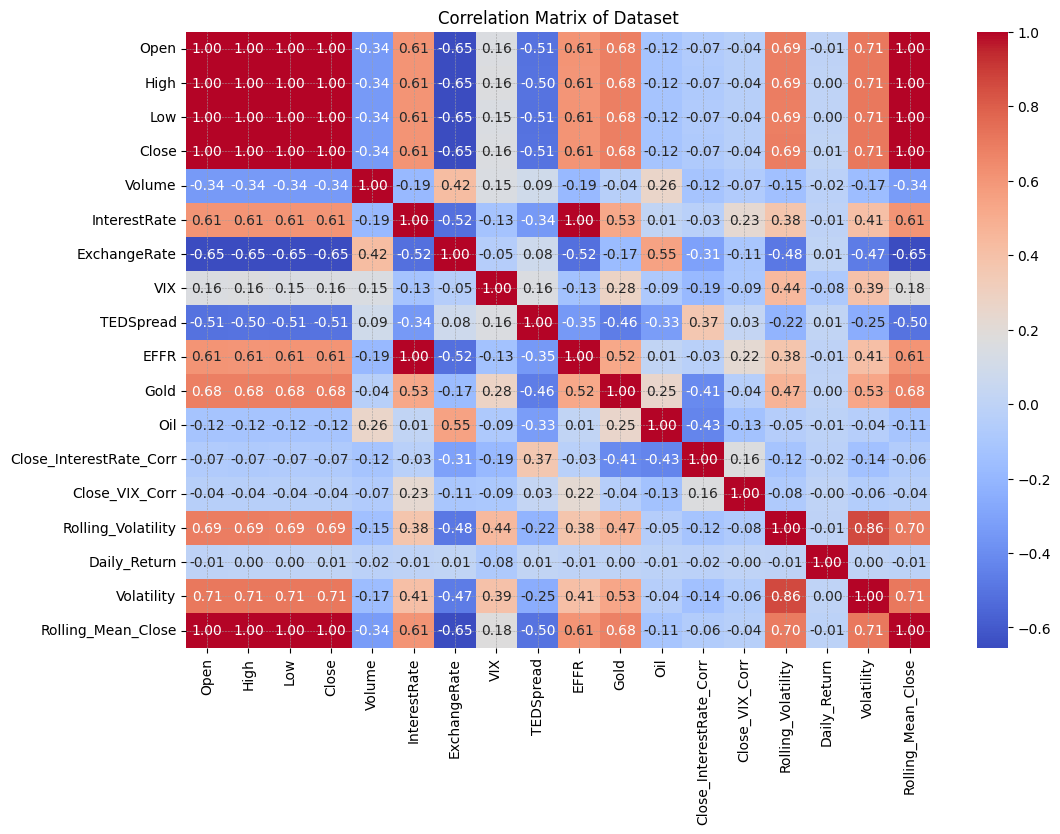

In [27]:
# Step 1: Add additional features
df['Daily_Return'] = df['Close'].pct_change()
df['Volatility'] = df['Close'].rolling(window=30).std()
df['Rolling_Mean_Close'] = df['Close'].rolling(window=30).mean()

# Step 2: Drop any initial NaN values from the added rolling features
df.dropna(inplace=True)

# Step 3: Define target variable and features
X = df.drop(['Close'], axis=1)  # Drop 'Close' to create the feature set
y = df['Close']  # Target variable is 'Close' price

# Step 4: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 5: Check for NaN values and handle them with forward fill
X.fillna(method='ffill', inplace=True)

# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm data scaling
print("Data scaling successful!")

# Optional: Visualize the feature correlations if needed
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Dataset")
plt.show()

# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Baseline model</p>

In [28]:
# Import necessary libraries for model training and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Train a baseline Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate the model
r2 = r2_score(y_test, y_pred_lr)
rmse = mean_squared_error(y_test, y_pred_lr, squared=False)

print("Linear Regression R2 Score:", r2)
print("Linear Regression RMSE:", rmse)


Linear Regression R2 Score: 0.9999215592685742
Linear Regression RMSE: 0.16967246382746456


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Random Forest</p>

In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Initialize and train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate the model
rf_r2 = r2_score(y_test, y_pred_rf)
rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)

print("Random Forest R2 Score:", rf_r2)
print("Random Forest RMSE:", rf_rmse)


Random Forest R2 Score: 0.9998801882559133
Random Forest RMSE: 0.20969604723189736


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Advanced modelling LSTM</p>

Epoch 1/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0447
Epoch 2/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0022
Epoch 3/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0019
Epoch 4/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - loss: 0.0017
Epoch 5/5
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0017
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


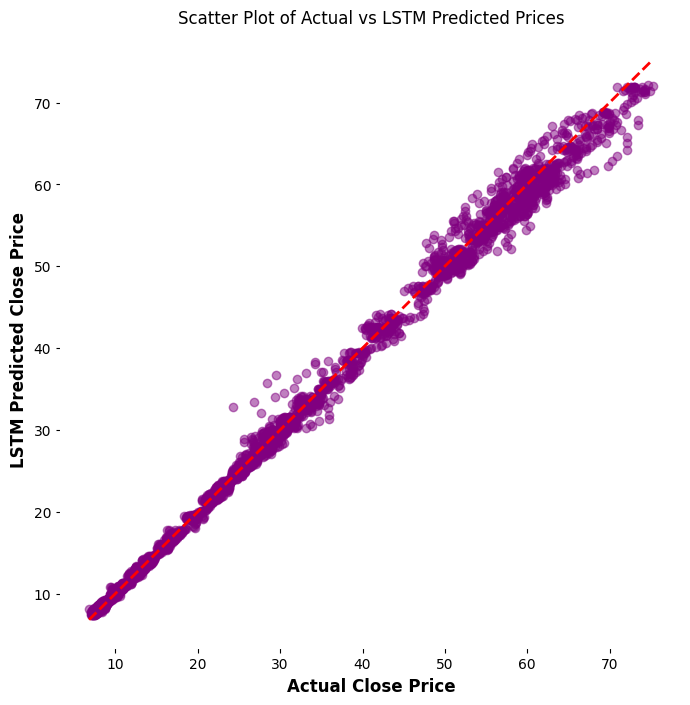

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame containing the 'Close' price

# Prepare data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

sequence_length = 60  # 60 days sequence
X_lstm = []
y_lstm = []

for i in range(sequence_length, len(scaled_data)):
    X_lstm.append(scaled_data[i-sequence_length:i, 0])
    y_lstm.append(scaled_data[i, 0])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_lstm, y_lstm, epochs=5, batch_size=64)

# Make predictions
predictions = model.predict(X_lstm)
predictions = scaler.inverse_transform(predictions)

# Scatter plot for actual vs predicted prices
plt.figure(figsize=(8, 8))
plt.scatter(df['Close'].values[sequence_length:], predictions, color='purple', alpha=0.5)
plt.plot([df['Close'].min(), df['Close'].max()], 
         [df['Close'].min(), df['Close'].max()], 
         color='red', linestyle='--')  # Identity line
plt.title("Scatter Plot of Actual vs LSTM Predicted Prices")
plt.xlabel("Actual Close Price")
plt.ylabel("LSTM Predicted Close Price")
plt.grid()
plt.show()


# <p style="font-family: 'Amiri'; font-size: 2rem; color: black; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #deadb2; padding: 10px; border-radius: 20px; border: 8px solid black; width:90%">Important Analysis</p>

In [31]:
# Assuming 'data' DataFrame has already been defined and preprocessed
# Define target variable and features
X = df.drop(['Close'], axis=1)  # Features
y = df['Close']  # Target variable


In [32]:
# Step 1: Replace infinite values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

In [33]:
# Step 2: Check for NaN values and handle them
X.fillna(method='ffill', inplace=True)

In [34]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:

# Step 4: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [36]:
# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [37]:
# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test_scaled)

In [38]:
from lightgbm import LGBMRegressor
# Train LightGBM model
best_lgb = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_lgb.fit(X_train_scaled, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3784
[LightGBM] [Info] Number of data points in the train set: 2888, number of used features: 17
[LightGBM] [Info] Start training from score 30.997115


LGBMRegressor(random_state=42)

In [39]:
# Make predictions with Random Forest
y_pred_rf = rf.predict(X_test_scaled)

In [40]:
# Train LightGBM model
best_lgb = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
best_lgb.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3784
[LightGBM] [Info] Number of data points in the train set: 2888, number of used features: 17
[LightGBM] [Info] Start training from score 30.997115


LGBMRegressor(random_state=42)

In [41]:
# Make predictions with LightGBM
y_pred_lgb = best_lgb.predict(X_test_scaled)


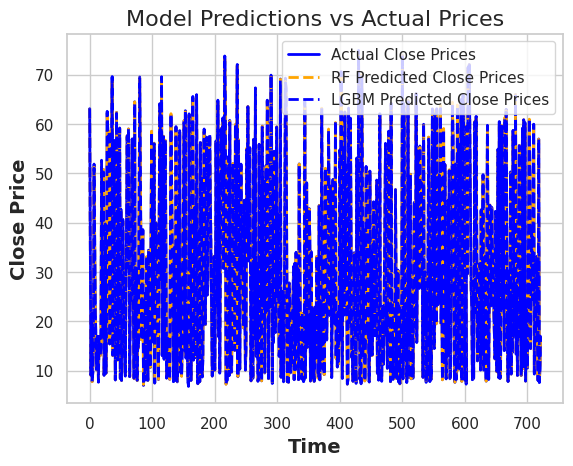

In [42]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot actual close prices
plt.plot(y_test.values, label="Actual Close Prices", color="blue", linewidth=2)

# Plot Random Forest predictions
plt.plot(y_pred_rf, label="RF Predicted Close Prices", linestyle='--', color="orange", linewidth=2)

# Plot LightGBM predictions
plt.plot(y_pred_lgb, label="LGBM Predicted Close Prices", linestyle='--', color="blue", linewidth=2)

# Adding title and labels
plt.title("Model Predictions vs Actual Prices", fontsize=16)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Close Price", fontsize=14)

# Add a legend
plt.legend()

# Add a grid for easier readability
plt.grid(True)

In [43]:
# Add annotations for significant errors
error_indices = np.where(np.abs(y_test.values - y_pred_lgb) > 10)  # Customize the error threshold
for idx in error_indices[0][:5]:  # Annotate first 5 occurrences
    plt.annotate('Error', (idx, y_test.values[idx]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10, color='red')

# Show the plot
plt.show()

# Print evaluation metrics
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))
print("LightGBM R2 Score:", r2_score(y_test, y_pred_lgb))
print("LightGBM RMSE:", mean_squared_error(y_test, y_pred_lgb, squared=False))

Random Forest R2 Score: 0.9998801882559133
Random Forest RMSE: 0.20969604723189736
LightGBM R2 Score: 0.9998880840513831
LightGBM RMSE: 0.20266863342749591
